In [2]:
from __future__ import print_function, division
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import json
import numpy as np
import os

In [3]:
with open(os.path.join("reviews.json")) as f:
    reviews = json.load(f)

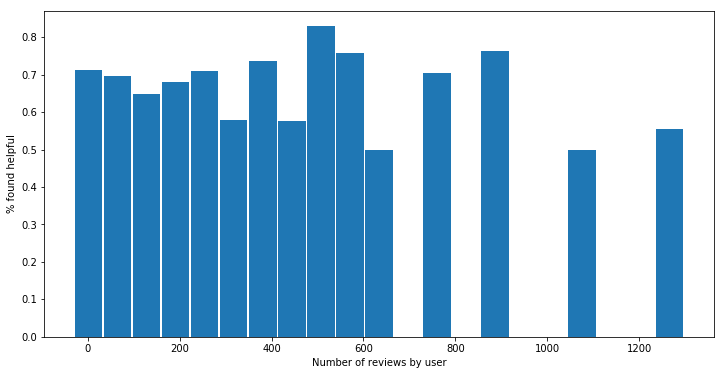

In [6]:
hours_played_v_helpfulness = list()
for app in reviews:
    for review in reviews[app]:
        if review["total"] > 0 and review["on_record"] > 1:
            hours_played_v_helpfulness.append((review["num_reviews"], review["helpful"] / review["total"]))
hours, helpfulness = np.array(hours_played_v_helpfulness).T

_, bins = np.histogram(hours, bins=20)
score = np.zeros(bins.shape)
for i in xrange(len(bins) - 1):
    score[i] = np.mean(helpfulness[np.logical_and(bins[i] <= hours, hours < bins[i+1])])
score[-1] = np.mean(helpfulness[bins[-1] <= hours])

with PdfPages('num_reviews_v_helpfulness.pdf') as pdf:
    fig = plt.figure(figsize=(12,6))
    plt.bar(bins, score, width=np.max(bins)/len(bins))
    plt.xlabel("Number of reviews by user")
    plt.ylabel("% found helpful")
    pdf.savefig(fig)

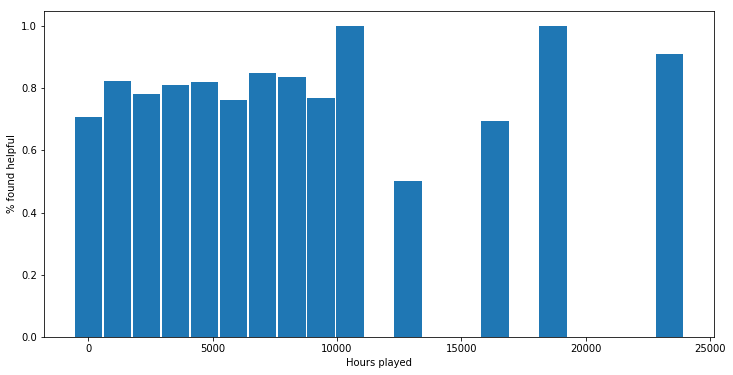

In [5]:
hours_played_v_helpfulness = list()
for app in reviews:
    for review in reviews[app]:
        if review["total"] > 0 and review["on_record"] > 1:
            hours_played_v_helpfulness.append((review["on_record"], review["helpful"] / review["total"]))
hours, helpfulness = np.array(hours_played_v_helpfulness).T

_, bins = np.histogram(hours, bins=20)
score = np.zeros(bins.shape)
for i in xrange(len(bins) - 1):
    score[i] = np.mean(helpfulness[np.logical_and(bins[i] <= hours, hours < bins[i+1])])
score[-1] = np.mean(helpfulness[bins[-1] <= hours])

with PdfPages('hours_played_v_helpfulness.pdf') as pdf:
    plt.figure(figsize=(12,6))
    plt.bar(bins, score, width=np.max(bins)/len(bins))
    plt.xlabel("Hours played")
    plt.ylabel("% found helpful")